# Reasoning Models Token Cost Demo

This notebook demonstrates OpenAI's reasoning models at different reasoning effort levels and compares token usage (input, reasoning, and output tokens) for each level.

**Test Prompt:** A spatial reasoning puzzle about a baseball in a box with a hole being shipped from Houston to New York City.

## 1. Install and Import Required Libraries

In [1]:
# Install OpenAI library (uncomment if needed)
# !pip install openai pandas matplotlib

import os
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt
import json

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Set Up OpenAI API Client

In [2]:
# Set up the OpenAI API key
# Option 1: Set environment variable OPENAI_API_KEY
# Option 2: Uncomment and add your key directly (not recommended for production)
# os.environ["OPENAI_API_KEY"] = "your-api-key-here"

client = OpenAI()
print("OpenAI client configured successfully!")

OpenAI client configured successfully!


## 3. Define the Test Prompt

In [3]:
test_prompt = """I live in Houston, Texas and I have a box with a big hole in it and I need to ship a baseball. I put the ball into the box. Tape it up. Put a label on it. Then send it to my friend in New York City, New York. He picks up the box on Union Street. Takes a cab to his out on Wilson Blvd and goes into his kitchen. He then opens the box and pours out the contents. Where is the baseball?"""

print("Test Prompt:")
print(test_prompt)

Test Prompt:
I live in Houston, Texas and I have a box with a big hole in it and I need to ship a baseball. I put the ball into the box. Tape it up. Put a label on it. Then send it to my friend in New York City, New York. He picks up the box on Union Street. Takes a cab to his out on Wilson Blvd and goes into his kitchen. He then opens the box and pours out the contents. Where is the baseball?


## 4. Test with Different Reasoning Levels

We'll test GPT-5.2 with different reasoning effort levels using the Responses API:
- **None** (standard response without reasoning)
- **Low** reasoning effort
- **Medium** reasoning effort (default)
- **High** reasoning effort
- **Extra High** (`xhigh`) reasoning effort

In [4]:
# Helper function to query GPT-5.2 and extract token usage
def query_model(model_name, reasoning_effort=None):
    """Query a model using the Responses API and return response with token usage."""
    try:
        # Default to "none" if not specified, or use the provided effort
        effort = reasoning_effort if reasoning_effort else "none"
        
        response = client.responses.create(
            model=model_name,
            input=[{"role": "user", "content": test_prompt}],
            reasoning={"effort": effort}
        )
        
        # Extract token usage from the response
        usage = response.usage
        
        # Get reasoning tokens from output_tokens_details
        reasoning_tokens = 0
        if hasattr(usage, 'output_tokens_details') and usage.output_tokens_details:
            reasoning_tokens = getattr(usage.output_tokens_details, 'reasoning_tokens', 0) or 0
        
        result = {
            "model": model_name,
            "reasoning_effort": effort,
            "input_tokens": usage.input_tokens,
            "reasoning_tokens": reasoning_tokens,
            "output_tokens": usage.output_tokens,
            "total_tokens": usage.total_tokens,
            "answer": response.output_text
        }
        return result
    except Exception as e:
        return {
            "model": model_name,
            "reasoning_effort": reasoning_effort if reasoning_effort else "none",
            "error": str(e),
            "input_tokens": 0,
            "reasoning_tokens": 0,
            "output_tokens": 0,
            "total_tokens": 0,
            "answer": f"Error: {str(e)}"
        }

print("Helper function defined successfully!")

Helper function defined successfully!


### 4.1 GPT-5.2 with No Reasoning Effort

In [5]:
print("Testing GPT-5.2 with no reasoning effort...")
result_gpt52_none = query_model("gpt-5.2", reasoning_effort="none")
print(f"\nModel: {result_gpt52_none['model']}")
print(f"Reasoning Effort: {result_gpt52_none['reasoning_effort']}")
print(f"Input Tokens: {result_gpt52_none['input_tokens']}")
print(f"Reasoning Tokens: {result_gpt52_none['reasoning_tokens']}")
print(f"Output Tokens: {result_gpt52_none['output_tokens']}")
print(f"Total Tokens: {result_gpt52_none['total_tokens']}")
print(f"\nAnswer: {result_gpt52_none['answer'][:500]}...")

Testing GPT-5.2 with no reasoning effort...

Model: gpt-5.2
Reasoning Effort: none
Input Tokens: 103
Reasoning Tokens: 0
Output Tokens: 58
Total Tokens: 161

Answer: In your friend’s kitchen in New York City—on the floor (or wherever it lands).

Even though the box has a big hole, the baseball is too large to fall out through it, so it stays in the box until he opens it and pours it out....


### 4.2 GPT-5.2 with Low Reasoning Effort

In [6]:
print("Testing GPT-5.2 with low reasoning effort...")
result_gpt52_low = query_model("gpt-5.2", reasoning_effort="low")
print(f"\nModel: {result_gpt52_low['model']}")
print(f"Reasoning Effort: {result_gpt52_low['reasoning_effort']}")
print(f"Input Tokens: {result_gpt52_low['input_tokens']}")
print(f"Reasoning Tokens: {result_gpt52_low['reasoning_tokens']}")
print(f"Output Tokens: {result_gpt52_low['output_tokens']}")
print(f"Total Tokens: {result_gpt52_low['total_tokens']}")
print(f"\nAnswer: {result_gpt52_low['answer'][:500]}...")

Testing GPT-5.2 with low reasoning effort...

Model: gpt-5.2
Reasoning Effort: low
Input Tokens: 103
Reasoning Tokens: 59
Output Tokens: 112
Total Tokens: 215

Answer: The baseball never makes it to New York.

Because the box has a big hole in it, the ball would have fallen out of the box (most likely back in Houston, sometime after you put it in and before it got delivered)....


### 4.3 GPT-5.2 with Medium Reasoning Effort

In [7]:
print("Testing GPT-5.2 with medium reasoning effort...")
result_gpt52_medium = query_model("gpt-5.2", reasoning_effort="medium")
print(f"\nModel: {result_gpt52_medium['model']}")
print(f"Reasoning Effort: {result_gpt52_medium['reasoning_effort']}")
print(f"Input Tokens: {result_gpt52_medium['input_tokens']}")
print(f"Reasoning Tokens: {result_gpt52_medium['reasoning_tokens']}")
print(f"Output Tokens: {result_gpt52_medium['output_tokens']}")
print(f"Total Tokens: {result_gpt52_medium['total_tokens']}")
print(f"\nAnswer: {result_gpt52_medium['answer'][:500]}...")

Testing GPT-5.2 with medium reasoning effort...

Model: gpt-5.2
Reasoning Effort: medium
Input Tokens: 103
Reasoning Tokens: 980
Output Tokens: 1032
Total Tokens: 1135

Answer: The baseball probably never makes it to his kitchen: since the box has a big hole in it, the ball would fall out **somewhere during shipping between Houston and New York City**, leaving the box empty when he opens it....


### 4.4 GPT-5.2 with High Reasoning Effort

In [8]:
print("Testing GPT-5.2 with high reasoning effort...")
result_gpt52_high = query_model("gpt-5.2", reasoning_effort="high")
print(f"\nModel: {result_gpt52_high['model']}")
print(f"Reasoning Effort: {result_gpt52_high['reasoning_effort']}")
print(f"Input Tokens: {result_gpt52_high['input_tokens']}")
print(f"Reasoning Tokens: {result_gpt52_high['reasoning_tokens']}")
print(f"Output Tokens: {result_gpt52_high['output_tokens']}")
print(f"Total Tokens: {result_gpt52_high['total_tokens']}")
print(f"\nAnswer: {result_gpt52_high['answer'][:500]}...")

Testing GPT-5.2 with high reasoning effort...

Model: gpt-5.2
Reasoning Effort: high
Input Tokens: 103
Reasoning Tokens: 1753
Output Tokens: 1811
Total Tokens: 1914

Answer: The baseball ends up **in your friend’s kitchen in New York City**—when he opens the box and dumps (“pours”) it out, the ball falls out and lands on the **kitchen floor** (or whatever surface he dumps it onto)....


### 4.5 GPT-5.2 with Extra High Reasoning Effort

In [9]:
print("Testing GPT-5.2 with extra high reasoning effort...")
result_gpt52_xhigh = query_model("gpt-5.2", reasoning_effort="xhigh")
print(f"\nModel: {result_gpt52_xhigh['model']}")
print(f"Reasoning Effort: {result_gpt52_xhigh['reasoning_effort']}")
print(f"Input Tokens: {result_gpt52_xhigh['input_tokens']}")
print(f"Reasoning Tokens: {result_gpt52_xhigh['reasoning_tokens']}")
print(f"Output Tokens: {result_gpt52_xhigh['output_tokens']}")
print(f"Total Tokens: {result_gpt52_xhigh['total_tokens']}")
print(f"\nAnswer: {result_gpt52_xhigh['answer'][:500]}...")

Testing GPT-5.2 with extra high reasoning effort...

Model: gpt-5.2
Reasoning Effort: xhigh
Input Tokens: 103
Reasoning Tokens: 10824
Output Tokens: 10875
Total Tokens: 10978

Answer: The baseball never made it to New York—because the box has a big hole, the baseball would fall out as soon as you put it in. So it’s back in Houston (on the floor where you packed it)....


## 5. Compare Token Usage Across All Reasoning Levels

In [14]:
# Compile all results into a dataframe
results = [
    result_gpt52_none,
    result_gpt52_low,
    result_gpt52_medium,
    result_gpt52_high,
    result_gpt52_xhigh
]

# Create comparison dataframe
df = pd.DataFrame(results)

# Calculate costs based on GPT-5.2 pricing (as of Jan 2026)
# Pricing: Input $0.875/1M, Output $7.00/1M (Reasoning tokens are billed as output tokens)
INPUT_PRICE_PER_1M = 0.875
OUTPUT_PRICE_PER_1M = 7.00

df['input_cost'] = (df['input_tokens'] / 1_000_000) * INPUT_PRICE_PER_1M
df['output_cost'] = (df['output_tokens'] / 1_000_000) * OUTPUT_PRICE_PER_1M
df['total_cost'] = df['input_cost'] + df['output_cost']

# Display dataframe with costs
df_display = df[['model', 'reasoning_effort', 'total_tokens', 'total_cost', 'input_cost', 'output_cost']]
pd.options.display.float_format = '${:,.6f}'.format

print("\n" + "="*80)
print("TOKEN USAGE & COST COMPARISON - GPT-5.2 ACROSS REASONING LEVELS")
print("="*80)
print(df_display.to_string(index=False))
print("="*80)


TOKEN USAGE & COST COMPARISON - GPT-5.2 ACROSS REASONING LEVELS
  model reasoning_effort  total_tokens  total_cost  input_cost  output_cost
gpt-5.2             none           161   $0.000496   $0.000090    $0.000406
gpt-5.2              low           215   $0.000874   $0.000090    $0.000784
gpt-5.2           medium          1135   $0.007314   $0.000090    $0.007224
gpt-5.2             high          1914   $0.012767   $0.000090    $0.012677
gpt-5.2            xhigh         10978   $0.076215   $0.000090    $0.076125


## 6. Visualize Token Costs

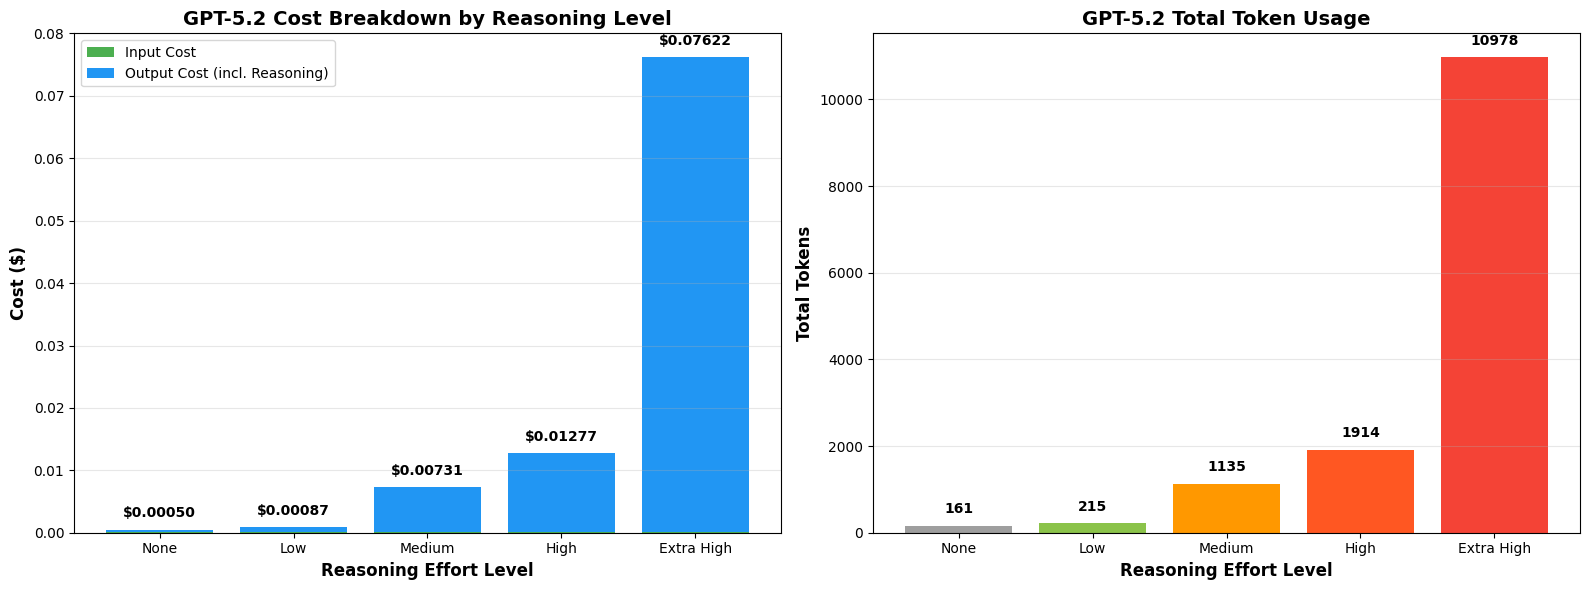


Visualization complete!


In [15]:
# Create labels for plotting
effort_labels = ['None', 'Low', 'Medium', 'High', 'Extra High']
df['label'] = effort_labels

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Stacked Bar Chart for Cost Breakdown
x_pos = range(len(df))
ax1.bar(x_pos, df['input_cost'], label='Input Cost', color='#4CAF50')
ax1.bar(x_pos, df['output_cost'], bottom=df['input_cost'], 
        label='Output Cost (incl. Reasoning)', color='#2196F3')

ax1.set_xlabel('Reasoning Effort Level', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cost ($)', fontsize=12, fontweight='bold')
ax1.set_title('GPT-5.2 Cost Breakdown by Reasoning Level', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(effort_labels)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars for total cost
for i, v in enumerate(df['total_cost']):
    ax1.text(i, v + max(df['total_cost']) * 0.02, f"${v:.5f}", 
             ha='center', va='bottom', fontweight='bold')

# Chart 2: Total Token Count for Context
colors = ['#9E9E9E', '#8BC34A', '#FF9800', '#FF5722', '#F44336']
ax2.bar(x_pos, df['total_tokens'], color=colors)
ax2.set_xlabel('Reasoning Effort Level', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Tokens', fontsize=12, fontweight='bold')
ax2.set_title('GPT-5.2 Total Token Usage', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(effort_labels)
ax2.grid(axis='y', alpha=0.3)

# Add token count labels
for i, v in enumerate(df['total_tokens']):
    ax2.text(i, v + max(df['total_tokens']) * 0.02, str(v), 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nVisualization complete!")

## 7. View Full Answers from Each Reasoning Level

In [12]:
for i, result in enumerate(results, 1):
    print(f"\n{'='*80}")
    print(f"RESULT #{i}: GPT-5.2 ({result['reasoning_effort']})")
    print(f"{'='*80}")
    print(f"Input Tokens: {result['input_tokens']}")
    print(f"Reasoning Tokens: {result['reasoning_tokens']}")
    print(f"Output Tokens: {result['output_tokens']}")
    print(f"Total Tokens: {result['total_tokens']}")
    print(f"\nFull Answer:\n{result['answer']}")
    print(f"{'='*80}\n")


RESULT #1: GPT-5.2 (none)
Input Tokens: 103
Reasoning Tokens: 0
Output Tokens: 58
Total Tokens: 161

Full Answer:
In your friend’s kitchen in New York City—on the floor (or wherever it lands).

Even though the box has a big hole, the baseball is too large to fall out through it, so it stays in the box until he opens it and pours it out.


RESULT #2: GPT-5.2 (low)
Input Tokens: 103
Reasoning Tokens: 59
Output Tokens: 112
Total Tokens: 215

Full Answer:
The baseball never makes it to New York.

Because the box has a big hole in it, the ball would have fallen out of the box (most likely back in Houston, sometime after you put it in and before it got delivered).


RESULT #3: GPT-5.2 (medium)
Input Tokens: 103
Reasoning Tokens: 980
Output Tokens: 1032
Total Tokens: 1135

Full Answer:
The baseball probably never makes it to his kitchen: since the box has a big hole in it, the ball would fall out **somewhere during shipping between Houston and New York City**, leaving the box empty when he o

## 8. Key Insights

**About the Responses API:**

The OpenAI Responses API (`client.responses.create()`) is the recommended way to use GPT-5.2 and other reasoning models. Key parameters:
- `reasoning={"effort": "none|low|medium|high|xhigh"}` - Controls reasoning depth
- `input=[{"role": "user", "content": "..."}]` - The input messages
- Response includes `output_text` for the answer and `usage.output_tokens_details.reasoning_tokens` for reasoning token count

**Expected Observations:**

1. **None/Reference (No Reasoning)** - Fastest response with minimal internal reasoning. May miss nuanced details in complex problems.

2. **Low Reasoning** - Light reasoning overhead, good for straightforward questions.

3. **Medium Reasoning** (default) - Balanced approach between speed and thoroughness.

4. **High Reasoning** - Deep reasoning for complex problems.

5. **Extra High (xhigh) Reasoning** - Maximum reasoning effort, potentially exploring the broadest range of possibilities before answering.

6. **Token Cost Trade-off**: As reasoning effort increases:
   - More **reasoning tokens** are generated (internal "thinking")
   - Answers tend to be more thorough and accurate
   - Total token costs increase significantly
   - Response times are longer

7. **The Baseball Question**: This tests spatial reasoning - the ball likely fell out through the hole during shipping. Higher reasoning levels should be more likely to catch this critical detail and correctly answer that the baseball is "somewhere between Houston and New York" rather than "in the box."